In [127]:
import torch
from torchvision import models
import numpy as np
import matplotlib.pyplot as plt
import pyautogui

In [104]:
#loading pretrained VGG16 model
vgg16 = models.vgg16(pretrained=True)
#set to evaluation mode as we are inferencing
vgg16.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [5]:
#loading saved imagenet index to classes dictionary
imagenet_idx2cls = torch.load('imagenet_idx2cls.pt')

In [106]:
#load saved tensor images
img_tensors = torch.load('imgs.pt')

In [84]:
pil_imgs = torch.load('PIL_imgs.pt')

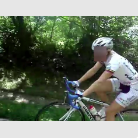

In [102]:
#inference
idx =8
pil_imgs[idx]

In [107]:
results = vgg16(img_tensors[idx].unsqueeze(0))
#top 5 results
_, pans = torch.topk(results,5,1)

for i in pans[0]:
    print(imagenet_idx2cls[i.item()])

mountain bike, all-terrain bike, off-roader
bicycle-built-for-two, tandem bicycle, tandem
knee pad
moped
bikini, two-piece


In [108]:
pans

tensor([[671, 444, 615, 665, 445]])

In [118]:
#create a dictionary to map ocr to class labels in imagenet 
ocr_dict = {'airplane':['airliner', 'warplane, military plane', 'wing'],
            'a bus':['passenger car, coach, carriage', 'minibus', 'school bus', 'moving van','trolleybus, trolley coach, trackless trolley'],
            'umbrella':['umbrella', "academic gown, academic robe, judge's robe"],
            'bicycle':['mountain bike, all-terrain bike, off-roader', 'bicycle-built-for-two, tandem bicycle, tandem']}

In [123]:
# category = get_category(im)
category  = 'bicycle'
coors = get_coordinates()


for i in range(9): #iterate over each image
    scores = vgg16(img_tensors[i].unsqueeze(0))
    _, top_preds = torch.topk(scores,5,1)
    top_preds = [imagenet_idx2cls[pred.item()] for pred in top_preds[0]]
    
    for label in ocr_dict[category]:
        if label in top_preds:
            imge_coors = coor[i]
            x,y = (imge_coors[0] + imge_coors[2])/2, (imge_coors[1] + imge_coors[3])/2
#             pyautogui.click(x,y,button='left')
            
            break

In [117]:
top_preds

['mountain bike, all-terrain bike, off-roader',
 'bicycle-built-for-two, tandem bicycle, tandem',
 'knee pad',
 'moped',
 'bikini, two-piece']